![Old Youtube logo](http://moziru.com/images/youtube-clipart-youtube-logo-4.png)

# Video Trends and More

by Raul Maldonado

## 1.0 Introduction

Welcome! We explore some of the interesting simple numbers of trending Youtube videos from **mid-November 2017 until January 2018.** In total, we have an estimated 50,000 records to evaluate--So, let's get started! 😊

### 1.1 Importing Modules and Data

We initially import our information and tools for this analysis. There a couple of comments to this initial process:

1. Data was provided by Kaggle User Mitchell J. in several files, but I went through the data-cleaning process in [this DataCleaning folder](../DataInspection).

2. I created a quick Descriptive Statistic function for this particular dataset. You can find this .py file in the [Resources folder](../Resources)

In [1]:
from IPython.display import HTML

HTML('''<script> code=true; 
    function code_toggle() {
         if (code){
             $('div.input').hide();} 
         else {
             $('div.input').show();
            }
         code = !code
    } 
    $( document ).ready(code_toggle);
    </script>
    <form action="javascript:code_toggle()"><input type="submit" 
    value="Click here to toggle on/off the Code text."></form>''')

# Code from https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

In [2]:
import sys
sys.path.insert(0,"../Resources/Modules")

In [3]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

#Personal module for quick Descriptive Stat Viz
import visual_descriptiveStats as vds
from pivotToDf import pivotTab_toDF

In [4]:
youtube_df= pd.read_csv("../Data/youtubeVid_main.csv",sep = ",")

#format the trend date from string format of mm/dd/yy to date 
#format mm-dd-yy, for correct datatype assignment

youtube_df["trending_date"] = pd.to_datetime(youtube_df["trending_date"] \
                                           , format = "%Y/%m/%d")

## 1.2 Preliminary Thoughts

### Question # 1

From the list of trending videos that occured from November 2017-January 2018,

What are the top 10 trending 

1. **Youtube videos**
2. **Categories**
3. **Youtube Channels**

based on user view counts

### Question # 2

From the top videos, categories, and Youtube channels, what countries dominate those spaces?

### Question # 3

Lastly, for these topics, what were the most disliked, liked, and ratio of likes?

From this analysis, we can distinguish what types of topics trending during the winter, and some of their characteristics.

## 2.0 Analysis

### 2.1 Total Views Per Day

The following visualization identifies the total views per day between 11/2017-01/2018.

In [7]:
ytDf_ttrendDate = youtube_df["trending_date"]
ytDf_views = youtube_df["views"]

order = np.argsort(ytDf_ttrendDate )
x_trendDate = np.array(ytDf_ttrendDate)[order]
y_views = np.array(ytDf_views )[order]

During the period of October 2017 until January 2018,       we had a total of 15982124093 views. In the following distribution,       we can see the total views per day


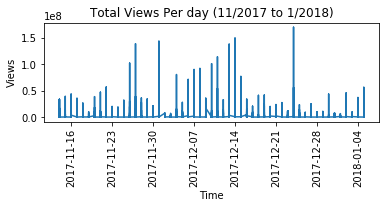

In [8]:
print("During the period of October 2017 until January 2018, \
      we had a total of %d views. In the following distribution, \
      we can see the total views per day" %  (youtube_df["views"].sum()))

plt.figure(1)
plt.subplot(211)


plt.title("Total Views Per day (11/2017 to 1/2018)")
plt.xticks(rotation = "vertical")
plt.xlabel("Time")
plt.ylabel("Views")
plt.plot(x_trendDate,y_views)
plt.show()

We observe a major increase of Youtube views from beginning of December 2017 until its end.

### 2.1 Top 10 from Channels, Videos, and Categories

We now identify the top 10 viewed trending channels, videos, and categories from November 2017-January 2018. 

From identifying these ranks for each feature, we identify the countries that  took the most interest for such feature. (E.g. For Youtube Highlights in several countries, we see that some country China viewed it more than any other country)

We'll proceed through these rankings by Youtube

1. Users (Channel Titles)

2. Videos (Titles)

3. Categories

#### 2.1.1 Top 10 Users (Channel Titles)

In [10]:
topUsers_df = pivotTab_toDF(dataset = youtube_df, value="views" \
                            , indices = "channel_title", aggregFunct = np.sum)[:10]
print("Top 10 Youtube Channels:\n")
topUsers_df

Top 10 Youtube Channels:



,channel_title,total_views
0,YouTube Spotlight,674196442
1,Ed Sheeran,558250009
2,LuisFonsiVEVO,387989509
3,Marvel Entertainment,380297875
4,EminemVEVO,263301085
5,GEazyMusicVEVO,224006918
6,5-Minute Crafts,200769312
7,jypentertainment,193145941
8,ibighit,190216895
9,Universal Pictures,186855788


#### 2.1.2 Top 10 Youtube Videos

In [11]:
topVideo_df = pivotTab_toDF(dataset = youtube_df, value="views", \
                            indices = "title", aggregFunct = np.sum)[:10]
print("Top 10 Youtube Videos:\n")
topVideo_df

Top 10 Youtube Videos:



,title,total_views
0,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,671891614
1,"Luis Fonsi, Demi Lovato - Échame La Culpa",387989509
2,Marvel Studios' Avengers: Infinity War Officia...,362897110
3,Ed Sheeran - Perfect (Official Music Video),288157980
4,Ed Sheeran - Perfect Duet (with Beyoncé) [Offi...,184327990
5,TWICE Heart Shaker M/V,167131962
6,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,163806412
7,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",150460228
8,Jurassic World: Fallen Kingdom - Official Trai...,149468770
9,Post Malone - rockstar ft. 21 Savage,140265611


#### 2.1.3 Top 5 Categories

In [21]:
topCat_df = pivotTab_toDF(dataset = youtube_df, value="views", \
                          indices = "category_name", aggregFunct = np.sum)[:5]
print("Top 5 Youtube Categories:\n")
topCat_df

Top 5 Youtube Categories:



,category_name,total_views
0,Music,4740513137
1,Entertainment,4735478990
2,Comedy,1544057914
3,People & Blogs,1031071829
4,Sports,921962563


### 2.2  Which Countries Populate the Top Category, Youtuber, or Youtube Video, Views?


In [13]:
#Obtaining the list of Top features
channel_namesC = list(topUsers_df["channel_title"])
title_namesC = list(topVideo_df["title"])
category_namesC = list(topCat_df["category_name"])

#### 2.2.1 Countries that Dominate the Top 10 Users (Channel Titles)

In [14]:
#Youtube videos by country
userByCountry_df  = youtube_df[youtube_df["channel_title"].isin(channel_namesC)]

In [15]:
userByCountry_dfMax =userByCountry_df.loc[userByCountry_df.groupby(["channel_title"])["views"].idxmax()]
userByCountry_dfMax

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Country,likes_prop,dislikes_prop,like_ratio
809,_9YMpuLDnwo,2017-12-11,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,5-Minute Crafts,26,Howto & Style,2017-12-03T08:30:00.000Z,54155921,378111,66632,24679,False,False,False,USA,0.850179,0.149821,5.674616
19011,2Vv-BfVoq4g,2017-11-27,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09T11:04:14.000Z,138578860,2584773,49428,113639,False,False,False,GB,0.981236,0.018764,52.293700
20406,n1WpP7iowLc,2017-11-27,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10T17:00:03.000Z,39235314,1044324,63815,137383,False,False,False,GB,0.942412,0.057588,16.364867
20367,l_lblj8Cq0o,2018-01-05,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",GEazyMusicVEVO,10,Music,2017-12-19T20:00:05.000Z,56253155,805351,49423,46178,False,False,False,GB,0.942180,0.057820,16.295065
19790,TyHvyGVs42U,2017-12-01,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,Music,2017-11-17T05:00:01.000Z,143408235,2686169,137938,144217,False,False,False,GB,0.951157,0.048843,19.473742
4274,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,Entertainment,2017-11-29T13:26:24.000Z,100672931,2701353,56313,368739,False,False,False,GB,0.979579,0.020421,47.970327
10285,vn9mMeWcgoM,2017-12-19,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,24,Entertainment,2017-12-08T01:44:25.000Z,41612497,566948,28954,68309,False,False,False,GB,0.951411,0.048589,19.580991
5263,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Entertainment,2017-12-06T17:58:51.000Z,169884583,3312868,1753274,845233,False,False,False,GB,0.653923,0.346077,1.889532
20334,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,Music,2017-11-24T09:00:02.000Z,54083634,2960250,57944,556154,False,False,False,GB,0.980802,0.019198,51.088120
20546,rRzxEiBLQCA,2017-12-24,TWICE Heart Shaker M/V,jypentertainment,10,Music,2017-12-11T08:59:59.000Z,55754734,1052809,103994,169779,False,False,False,GB,0.910102,0.089898,10.123748


#### 2.2.2 Countries that Dominate Top 10 Users (Channel Titles)

In [16]:
vidsByCountry_df = youtube_df[youtube_df["title"].isin(title_namesC)]
vidsByCountry_dfMax = vidsByCountry_df.loc[vidsByCountry_df.groupby(["title"])["views"].idxmax()]
vidsByCountry_dfMax

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Country,likes_prop,dislikes_prop,like_ratio
20334,kTlv5_Bs8aw,2017-12-07,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,ibighit,10,Music,2017-11-24T09:00:02.000Z,54083634,2960250,57944,556154,False,False,False,GB,0.980802,0.019198,51.088120
19011,2Vv-BfVoq4g,2017-11-27,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,Music,2017-11-09T11:04:14.000Z,138578860,2584773,49428,113639,False,False,False,GB,0.981236,0.018764,52.293700
19176,817P8W8-mGE,2017-12-15,Ed Sheeran - Perfect Duet (with Beyoncé) [Offi...,Ed Sheeran,10,Music,2017-12-01T00:54:56.000Z,76816483,1221200,39201,51421,False,False,False,GB,0.968898,0.031102,31.152267
20367,l_lblj8Cq0o,2018-01-05,"G-Eazy - No Limit REMIX ft. A$AP Rocky, Cardi ...",GEazyMusicVEVO,10,Music,2017-12-19T20:00:05.000Z,56253155,805351,49423,46178,False,False,False,GB,0.942180,0.057820,16.295065
10285,vn9mMeWcgoM,2017-12-19,Jurassic World: Fallen Kingdom - Official Trai...,Universal Pictures,24,Entertainment,2017-12-08T01:44:25.000Z,41612497,566948,28954,68309,False,False,False,GB,0.951411,0.048589,19.580991
19790,TyHvyGVs42U,2017-12-01,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,Music,2017-11-17T05:00:01.000Z,143408235,2686169,137938,144217,False,False,False,GB,0.951157,0.048843,19.473742
4274,6ZfuNTqbHE8,2017-12-14,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,Entertainment,2017-11-29T13:26:24.000Z,100672931,2701353,56313,368739,False,False,False,GB,0.979579,0.020421,47.970327
19811,UceaB4D0jpo,2017-12-06,Post Malone - rockstar ft. 21 Savage,PostMaloneVEVO,10,Music,2017-11-22T05:00:01.000Z,71173287,1642648,52596,108846,False,False,False,GB,0.968974,0.031026,31.231424
20546,rRzxEiBLQCA,2017-12-24,TWICE Heart Shaker M/V,jypentertainment,10,Music,2017-12-11T08:59:59.000Z,55754734,1052809,103994,169779,False,False,False,GB,0.910102,0.089898,10.123748
5263,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Entertainment,2017-12-06T17:58:51.000Z,169884583,3312868,1753274,845233,False,False,False,GB,0.653923,0.346077,1.889532


#### 2.2.3 Countries that Dominate Top 10 Users (Channel Titles)

In [17]:
categoryByCountry_df  = youtube_df[youtube_df["category_name"].isin(category_namesC)]
categoryByCountry_dfMax = categoryByCountry_df.loc[categoryByCountry_df.groupby(["category_name"])["views"].idxmax()]
categoryByCountry_dfMax 

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,Country,likes_prop,dislikes_prop,like_ratio
3325,wzKL-bQKcgA,2017-12-30,Anitta & J Balvin - Downtown (Official Lyric V...,Lele Pons,23,Comedy,2017-12-14T18:30:08.000Z,43460605,1253154,38693,58235,False,False,False,GB,0.970048,0.029952,32.387098
5263,FlsCjmMhFmw,2017-12-24,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,Entertainment,2017-12-06T17:58:51.000Z,169884583,3312868,1753274,845233,False,False,False,GB,0.653923,0.346077,1.889532
19790,TyHvyGVs42U,2017-12-01,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,10,Music,2017-11-17T05:00:01.000Z,143408235,2686169,137938,144217,False,False,False,GB,0.951157,0.048843,19.473742
13701,sXP6vliZIHI,2018-01-05,Cardi B - Bartier Cardi (feat. 21 Savage) [Off...,Cardi B,22,People & Blogs,2017-12-22T05:00:02.000Z,19020671,396911,21465,29562,False,False,False,GB,0.948694,0.051306,18.491078
21270,Ha3WCbl7S7s,2017-12-14,Virat Kohli And Anushka Sharma Marriage Ceremo...,Sports Blast,17,Sports,2017-12-11T18:18:17.000Z,15860214,131887,9601,6563,False,False,False,CA,0.932143,0.067857,13.736798


### 2.3 You Like It? 

We now evaluate the percentage of total likes and total dislikes, and the ratio of these two. 


Moreover, what can we conclude is the most liked and disliked for our top channels, videos, and categories? 🤔

#### 2.3.1 Most Liked, Disliked, and Ratio of Likes for Top Youtube Channels

In [18]:
means_userCountry = userByCountry_dfMax[["title","channel_title","Country","trending_date", \
                                         "views","likes_prop","dislikes_prop","like_ratio"]].mean()

user1 =userByCountry_dfMax[userByCountry_dfMax["likes_prop"]==np.max(userByCountry_dfMax["likes_prop"]) ]["channel_title"].values[0]
print("We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Users are:\n\n",means_userCountry)
print("\nAnd the highest percentage of likes for some Youtube channel goes to %s, for %f likes" % \
      (user1, userByCountry_dfMax[userByCountry_dfMax["likes_prop"]==np.max(userByCountry_dfMax["likes_prop"]) ]["likes_prop"]))

user2 =userByCountry_dfMax[userByCountry_dfMax["dislikes_prop"]==np.max(userByCountry_dfMax["dislikes_prop"]) ]["channel_title"].values[0]
print("\nAnd the highest percentage of dislikes for some Youtube channel goes to %s, for %f dislikes" % \
          (user2,userByCountry_dfMax[userByCountry_dfMax["dislikes_prop"]==np.max(userByCountry_dfMax["dislikes_prop"]) ]["dislikes_prop"]))

user3 =userByCountry_dfMax[userByCountry_dfMax["like_ratio"]==np.max(userByCountry_dfMax["like_ratio"]) ]["channel_title"].values[0]
print("\nAnd the highest ratio of likes for some Youtube channel goes to %s, for a ratio of %f likes to 1 dislikes" % \
          (user3, userByCountry_dfMax[userByCountry_dfMax["like_ratio"]==np.max(userByCountry_dfMax["like_ratio"]) ]["like_ratio"]))

We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Users are:

 views            8.536399e+07
likes_prop       9.142982e-01
dislikes_prop    8.570177e-02
like_ratio       2.407547e+01
dtype: float64

And the highest percentage of likes for some Youtube channel goes to Ed Sheeran, for 0.981236 likes

And the highest percentage of dislikes for some Youtube channel goes to YouTube Spotlight, for 0.346077 dislikes

And the highest ratio of likes for some Youtube channel goes to Ed Sheeran, for a ratio of 52.293700 likes to 1 dislikes


#### 2.3.2 Most Liked, Disliked, and Ratio of Likes for Top Youtube Videos

In [19]:
means_videoCountry = vidsByCountry_dfMax[["title","channel_title","Country","trending_date", \
                                         "views","likes_prop","dislikes_prop","like_ratio"]].mean()
vid1 = vidsByCountry_dfMax[vidsByCountry_dfMax["likes_prop"]==np.max(vidsByCountry_dfMax["likes_prop"]) ]["title"].values[0]
print("We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Videos are:\n\n",means_userCountry)
print("\nAnd the highest percentage of likes for some Youtube Video goes to %s, for %f dislikes" % \
      (vid1, vidsByCountry_dfMax[vidsByCountry_dfMax["likes_prop"]==np.max(vidsByCountry_dfMax["likes_prop"]) ]["likes_prop"]))

vid2 = vidsByCountry_dfMax[vidsByCountry_dfMax["dislikes_prop"]==np.max(vidsByCountry_dfMax["dislikes_prop"]) ]["title"].values[0]
print("\nAnd the highest percentage of dislikes for some Youtube Video goes to %s, for %f dislikes" % \
      (vid2, vidsByCountry_dfMax[vidsByCountry_dfMax["dislikes_prop"]==np.max(vidsByCountry_dfMax["dislikes_prop"]) ]["dislikes_prop"]))

vid3 = vidsByCountry_dfMax[vidsByCountry_dfMax["like_ratio"]==np.max(vidsByCountry_dfMax["like_ratio"]) ]["title"].values[0]
print("\nAnd the highest ratio of likes for some Youtube Video goes to %s, for a ratio of %f likes to 1 dislikes" % \
      (vid3,vidsByCountry_dfMax[vidsByCountry_dfMax["like_ratio"]==np.max(vidsByCountry_dfMax["like_ratio"]) ]["like_ratio"]))

We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Videos are:

 views            8.536399e+07
likes_prop       9.142982e-01
dislikes_prop    8.570177e-02
like_ratio       2.407547e+01
dtype: float64

And the highest percentage of likes for some Youtube Video goes to Ed Sheeran - Perfect (Official Music Video), for 0.981236 dislikes

And the highest percentage of dislikes for some Youtube Video goes to YouTube Rewind: The Shape of 2017 | #YouTubeRewind, for 0.346077 dislikes

And the highest ratio of likes for some Youtube Video goes to Ed Sheeran - Perfect (Official Music Video), for a ratio of 52.293700 likes to 1 dislikes


#### 2.3.3 Most Liked, Disliked, and Ratio of Likes for Youtube Categories

In [20]:
means_videoCountry = categoryByCountry_dfMax[["title","channel_title","Country","trending_date", \
                                         "views","likes_prop","dislikes_prop","like_ratio"]].mean()

print("We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Videos are:\n\n",means_userCountry)

name1 = categoryByCountry_dfMax[categoryByCountry_dfMax["likes_prop"]==np.max(categoryByCountry_dfMax["likes_prop"]) ]["category_name"].values[0]
print("\nAnd the highest percentage of likes for some Youtube Video goes to %s, for %f likes" % \
      (name1,categoryByCountry_dfMax[categoryByCountry_dfMax["likes_prop"]== \
                                     np.max(categoryByCountry_dfMax["likes_prop"]) ]["likes_prop"]))

name2 = categoryByCountry_dfMax[categoryByCountry_dfMax["dislikes_prop"]==np.max(categoryByCountry_dfMax["dislikes_prop"]) ]["category_name"].values[0]
print("\nAnd the highest percentage of dislikes for some Youtube Video is %s, for %f dislikes" % \
          (name2, categoryByCountry_dfMax[categoryByCountry_dfMax["dislikes_prop"]==np.max(categoryByCountry_dfMax["dislikes_prop"]) ]["dislikes_prop"]))

name3 = categoryByCountry_dfMax[categoryByCountry_dfMax["like_ratio"]==np.max(categoryByCountry_dfMax["like_ratio"]) ]["category_name"].values[0]
print("\nAnd the highest ratio of likes for some Youtube Category is %s, for a ratio of %f likes to 1 dislikes" % \
      (name3,categoryByCountry_dfMax[categoryByCountry_dfMax["like_ratio"]==np.max(categoryByCountry_dfMax["like_ratio"]) ]["like_ratio"]))
     

We observe that the averages of percentage of likes, dislikes, and like ratio for the top 10 Youtube Videos are:

 views            8.536399e+07
likes_prop       9.142982e-01
dislikes_prop    8.570177e-02
like_ratio       2.407547e+01
dtype: float64

And the highest percentage of likes for some Youtube Video goes to  Comedy, for 0.970048 likes

And the highest percentage of dislikes for some Youtube Video is  Entertainment, for 0.346077 dislikes

And the highest ratio of likes for some Youtube Category is  Comedy, for a ratio of 32.387098 likes to 1 dislikes
